In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
# make it easier to understand by importing the required libraries within keras
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import KFold
%matplotlib inline

In [2]:
tf.config.list_physical_devices('GPU')

[]

In [2]:
# from utils.database import nmlDB
# db = nmlDB("nml.db")

# db.get_ml_data_len()

In [3]:
data = np.load("test_data_v2.npy")
classifiers = np.load("test_classifiers_v2.npy")

# all_classifier_list = []
# all_data_list = []

# all_crack = db.get_all_ml_data()
# np.random.shuffle(all_crack)

# for entry in all_crack[0:100000]:
#     after_img = np.frombuffer(entry.img, dtype=np.uint8)  # type:ignore
#     all_classifier_list.append(entry.classifier)
#     all_data_list.append(after_img)

# # data_class = list(zip(all_data_list, all_classifier_list))
# # # print(data_class)
# # data, classifiers = zip(*data_class)
# data = np.array(all_data_list)
# classifiers = np.array(all_classifier_list)
# # print(data)
# # print(classifiers)

print(f"data shape = {data.shape}")
print(f"data example = {data}")

print(f"classifiers shape = {classifiers.shape}")
print(f"classifiers example = {classifiers}")

unique, counts = np.unique(classifiers, return_counts=True)
print(f"Occurances = {dict(zip(unique, counts))}")

data shape = (20000, 105625)
data example = [[ 76  76  76 ...  69  58  54]
 [ 90  62  48 ... 105 108 104]
 [123 120 127 ... 108 101 101]
 ...
 [103 110 127 ...  70  73  75]
 [ 54  57  59 ...  47  48  43]
 [149 142 132 ... 101 100 100]]
classifiers shape = (20000,)
classifiers example = [0 1 0 ... 1 0 1]
Occurances = {0: 10043, 1: 9957}


In [ ]:
# data = data
# classifiers = classifiers

In [4]:
# ONLY RUN ONCE

# convert to one hot encoding 
y_train = np.arange(1)
if len(classifiers.shape)==1:
    y_train = keras.utils.to_categorical(classifiers, num_classes=2)
print(y_train.shape)
print(y_train[0:3])
print('Old labels: {}'.format(np.argmax(y_train[:3], axis=1)))

# normalize input data
x_train = data.astype(float)/255
# x_train = data
print(x_train)

# split the data into training (9000) and testing (1000)
x_train_full = x_train
y_train_full = y_train
x_train, x_test = np.split(x_train, [18000])
y_train, y_test = np.split(y_train, [18000])

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_train_full.shape, y_train_full.shape)

(20000, 2)
[[1. 0.]
 [0. 1.]
 [1. 0.]]
Old labels: [0 1 0]


MemoryError: Unable to allocate 15.7 GiB for an array with shape (20000, 105625) and data type float64

In [6]:
def get_optimal_model_V2():

    crack_detect_model = keras.models.Sequential()

    # Hidden layers
    crack_detect_model.add(Dense(64, activation="relu", input_shape = (data.shape[1],)))
    crack_detect_model.add(Dense(64, activation="relu"))
    crack_detect_model.add(Dense(64, activation="relu"))
    crack_detect_model.add(Dense(64, activation="relu"))

    # Output layer
    crack_detect_model.add(Dense(2, activation="softmax"))

    # print(crack_detect_model.summary()) 

    crack_detect_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return crack_detect_model

Epoch 1/10
7/7 [==============================] - 30s 907ms/step - loss: 3.3989 - accuracy: 0.4980 - val_loss: 1.1014 - val_accuracy: 0.4976
Epoch 2/10
7/7 [==============================] - 2s 274ms/step - loss: 1.2186 - accuracy: 0.5460 - val_loss: 1.3179 - val_accuracy: 0.4976
Epoch 3/10
7/7 [==============================] - 2s 361ms/step - loss: 0.9351 - accuracy: 0.5682 - val_loss: 0.6557 - val_accuracy: 0.4989
Epoch 4/10
7/7 [==============================] - 2s 307ms/step - loss: 0.6678 - accuracy: 0.5883 - val_loss: 0.5586 - val_accuracy: 0.8424
Epoch 5/10
7/7 [==============================] - 2s 300ms/step - loss: 0.5572 - accuracy: 0.7595 - val_loss: 0.5563 - val_accuracy: 0.7464
Epoch 6/10
7/7 [==============================] - 2s 292ms/step - loss: 0.4970 - accuracy: 0.8194 - val_loss: 0.4699 - val_accuracy: 0.8198
Epoch 7/10
7/7 [==============================] - 2s 293ms/step - loss: 0.4537 - accuracy: 0.8370 - val_loss: 0.4059 - val_accuracy: 0.8600
Epoch 8/10
7/7 [===

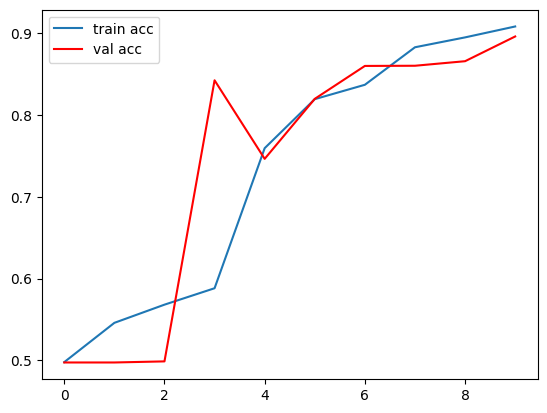

In [7]:
crack_detect_model = get_optimal_model_V2()

fitted_model = crack_detect_model.fit(x_train, y_train, epochs=10, batch_size=2000, validation_split=0.25, verbose=1)

print(fitted_model.model)
print(fitted_model.history)
print(fitted_model.validation_data)
print(fitted_model.epoch)

plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'], 'r')
plt.legend(['train acc', 'val acc'])
print('train acc: %.2f %% \nval acc: %.2f %%'%(fitted_model.history['accuracy'][-1]*100,fitted_model.history['val_accuracy'][-1]*100))

evaluated = crack_detect_model.evaluate(x_test, y_test, verbose=1)
print(evaluated)
print('Test accuracy: %.2f %%'%(100*evaluated[1]))

Epoch 1/10
8/8 [==============================] - 21s 1s/step - loss: 3.2830 - accuracy: 0.5074 - val_loss: 1.5558 - val_accuracy: 0.4920
Epoch 2/10
8/8 [==============================] - 2s 262ms/step - loss: 1.3488 - accuracy: 0.4983 - val_loss: 1.0064 - val_accuracy: 0.4992
Epoch 3/10
8/8 [==============================] - 3s 437ms/step - loss: 0.8931 - accuracy: 0.5018 - val_loss: 0.6502 - val_accuracy: 0.7578
Epoch 4/10
8/8 [==============================] - 2s 314ms/step - loss: 0.6940 - accuracy: 0.5585 - val_loss: 0.8126 - val_accuracy: 0.8190
Epoch 5/10
8/8 [==============================] - 2s 327ms/step - loss: 0.6637 - accuracy: 0.6143 - val_loss: 0.5205 - val_accuracy: 0.8812
Epoch 6/10
8/8 [==============================] - 2s 311ms/step - loss: 0.5144 - accuracy: 0.7749 - val_loss: 0.4849 - val_accuracy: 0.7948
Epoch 7/10
8/8 [==============================] - 2s 308ms/step - loss: 0.4552 - accuracy: 0.8607 - val_loss: 0.4424 - val_accuracy: 0.8578
Epoch 8/10
8/8 [======

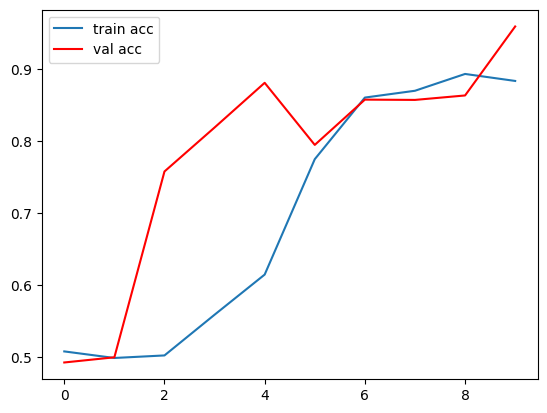

In [8]:
crack_detect_model_full = get_optimal_model_V2()

fitted_model = crack_detect_model_full.fit(x_train_full, y_train_full, epochs=10, batch_size=2000, validation_split=0.25, verbose=1)

print(fitted_model.model)
print(fitted_model.history)
print(fitted_model.validation_data)
print(fitted_model.epoch)

plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'], 'r')
plt.legend(['train acc', 'val acc'])
print('train acc: %.2f %% \nval acc: %.2f %%'%(fitted_model.history['accuracy'][-1]*100,fitted_model.history['val_accuracy'][-1]*100))

evaluated = crack_detect_model_full.evaluate(x_test, y_test, verbose=1)
print(evaluated)
print('Test accuracy: %.2f %%'%(100*evaluated[1]))

In [ ]:
# from sklearn.model_selection import KFold

# kf = KFold(n_splits=10)

# kfold_results = []

# for train_index, test_index in kf.split(x_train_full):
#   print("TRAIN:", train_index, "TEST:", test_index[0])
#   x_train, x_test = x_train_full[train_index], x_train_full[test_index]
#   y_train, y_test = y_train_full[train_index], y_train_full[test_index]
#   crack_detect_model = get_optimal_model_V2()

#   fitted_model = crack_detect_model.fit(x_train, y_train, epochs=5, batch_size=2000, validation_split=0.25, verbose=0)
#   print('train acc: %.2f %% \nval acc: %.2f %%'%(fitted_model.history['accuracy'][-1]*100,fitted_model.history['val_accuracy'][-1]*100))

#   evaluated = crack_detect_model.evaluate(x_test, y_test, verbose=1)
#   print(evaluated)
#   kfold_results.append(evaluated)

In [ ]:
kfold_losses = [res[0] for res in kfold_results]
kfold_accuracy = [res[1] for res in kfold_results]

fig, ax = plt.subplots()
fig.patch.set_facecolor("white")
lin1 = ax.plot(range(10), kfold_accuracy, label="Accuracy")
ax.set_xlabel("Iteration")
ax.set_ylabel("Accuracy")

ax2 = ax.twinx()
lin2 = ax2.plot(range(10), kfold_losses, 'r', label="Loss Values")
ax2.set_ylabel("Loss Values")
title_str = f"K-Fold Cross Validation (k={len(kfold_accuracy)})"
ax.set_title(title_str)

lins = lin1 + lin2
labels = [l.get_label() for l in lins]
ax.legend(lins, labels, loc=6)

plt.savefig("kfold-plot.svg", format="svg", dpi=1200, transparent=False, facecolor=fig.get_facecolor())

In [ ]:
# Save the model
# crack_detect_model_full.save("nmlModelV3")